# Data Cleaning


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving picking_data_sepatu.csv to picking_data_sepatu.csv


### Load and Inspect

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('picking_data_sepatu.csv')

# Column types and non null counts
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50250 entries, 0 to 50249
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  50250 non-null  object 
 1   shift                 50250 non-null  int64  
 2   order_id              50250 non-null  object 
 3   picker_id             50250 non-null  object 
 4   warehouse_zone        50250 non-null  object 
 5   brand                 50250 non-null  object 
 6   product_category      50250 non-null  object 
 7   item_count            49848 non-null  float64
 8   picking_time_min      49644 non-null  float64
 9   destination_country   50250 non-null  object 
 10  status                50250 non-null  object 
 11  error_type            1515 non-null   object 
 12  shipping_method       50250 non-null  object 
 13  supervisor_id         50250 non-null  object 
 14  quality_check_passed  50250 non-null  bool   
dtypes: bool(1), float64

,date,shift,order_id,picker_id,warehouse_zone,brand,product_category,item_count,picking_time_min,destination_country,status,error_type,shipping_method,supervisor_id,quality_check_passed
0,2025-04-18,1,ORD-001641,P02,D,Puma,Running,32.0,16.42,Netherlands,Complete,NaN,Sea,S01,True
1,2025-04-24,2,ORD-025699,P07,C,Adidas,Futsal,30.0,13.86,France,Pending,NaN,Sea,S02,False
2,2025-04-24,2,ORD-032225,P03,A,Puma,Sneakers,31.0,13.81,USA,Complete,NaN,Sea,S02,True
3,2025-03-27,2,ORD-032075,P06,B,Puma,Futsal,33.0,18.83,Malaysia,Complete,NaN,Air,S02,True
4,2025-03-16,1,ORD-048566,P08,E,LocalBrand,Futsal,28.0,14.32,Germany,Complete,NaN,Sea,S01,True


### Check and Handle Missing Values

In [ ]:
# Check number of missing values per column
print("\n=== Missing Values per Column ===")
print(df.isna().sum())



=== Missing Values per Column ===
date                        0
shift                       0
order_id                    0
picker_id                   0
warehouse_zone              0
brand                       0
product_category            0
item_count                402
picking_time_min          606
destination_country         0
status                      0
error_type              48735
shipping_method             0
supervisor_id               0
quality_check_passed        0
dtype: int64


In [ ]:
# Handle missing values
df['error_type'] = df['error_type'].fillna('No Error')
df['item_count'] = df['item_count'].fillna(df['item_count'].median())
df['picking_time_min'] = df['picking_time_min'].fillna(df['picking_time_min'].mean())

print("\n=== Missing Values per Column ===")
print(df.isna().sum())


=== Missing Values per Column ===
date                    0
shift                   0
order_id                0
picker_id               0
warehouse_zone          0
brand                   0
product_category        0
item_count              0
picking_time_min        0
destination_country     0
status                  0
error_type              0
shipping_method         0
supervisor_id           0
quality_check_passed    0
dtype: int64


### Check Data Inconsistencies

In [ ]:
# Import regex for checking patterns
import re

# 1. Identify numeric columns (floats/ints) that may be IDs
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
print("=== Numeric Columns ===")
print(numeric_columns)

# 2. Identify object columns that may contain dates stored as string
object_columns = df.select_dtypes(include=['object']).columns
print("\n=== Object Columns ===")
print(object_columns)

# 3. Find potential float IDs in order_id (IDs that should be string)
print("\n=== Sample order_id inconsistencies (floats as IDs) ===")
display(df[df['order_id'].str.contains(r'\d+\.\d+', na=False)].head(5))

# 4. Find brands with inconsistent capitalization or trailing spaces
print("\n=== Unique brand values (potential inconsistencies) ===")
print(df['brand'].unique())

# 5. Check warehouse zones with inconsistent casing
print("\n=== Unique warehouse zones ===")
print(df['warehouse_zone'].unique())


=== Numeric Columns ===
Index(['shift', 'item_count', 'picking_time_min'], dtype='object')

=== Object Columns ===
Index(['date', 'order_id', 'picker_id', 'warehouse_zone', 'brand',
       'product_category', 'destination_country', 'status', 'error_type',
       'shipping_method', 'supervisor_id'],
      dtype='object')

=== Sample order_id inconsistencies (floats as IDs) ===


,date,shift,order_id,picker_id,warehouse_zone,brand,product_category,item_count,picking_time_min,destination_country,status,error_type,shipping_method,supervisor_id,quality_check_passed



=== Unique brand values (potential inconsistencies) ===
['Puma' 'Adidas' 'LocalBrand' 'Nike' 'Reebok' 'Converse' 'Adidas '
 'Converse ' 'adidas' 'converse' 'reebok' 'nike' 'puma' 'Nike '
 'localbrand' 'Reebok ' 'Puma ']

=== Unique warehouse zones ===
['D' 'C' 'A' 'B' 'E' 'b' 'e' 'c' 'a' 'd']


### Fix Data Types, Standardize and Normalize

In [ ]:

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert ID columns to string (order_id, picker_id, supervisor_id)
df['order_id'] = df['order_id'].astype(str)
df['picker_id'] = df['picker_id'].astype(str)
df['supervisor_id'] = df['supervisor_id'].astype(str)

# Normalize text columns  and clean strings
df['brand'] = df['brand'].str.strip().str.title()         # e.g. 'adidas ' -> 'Adidas'
df['warehouse_zone'] = df['warehouse_zone'].str.strip().str.upper()  # e.g. 'b' -> 'B'
df['status'] = df['status'].str.strip().str.title()
df['product_category'] = df['product_category'].str.strip().str.title()
df['destination_country'] = df['destination_country'].str.strip().str.title()
df['shipping_method'] = df['shipping_method'].str.strip().str.title()

# Inspect cleaned data
print("=== Data Types ===")
print(df.dtypes)

print("\n=== Sample Cleaned Data ===")
display(df.head(10))


=== Data Types ===
date                    datetime64[ns]
shift                            int64
order_id                        object
picker_id                       object
warehouse_zone                  object
brand                           object
product_category                object
item_count                     float64
picking_time_min               float64
destination_country             object
status                          object
error_type                      object
shipping_method                 object
supervisor_id                   object
quality_check_passed              bool
dtype: object

=== Sample Cleaned Data ===


,date,shift,order_id,picker_id,warehouse_zone,brand,product_category,item_count,picking_time_min,destination_country,status,error_type,shipping_method,supervisor_id,quality_check_passed
0,2025-04-18,1,ORD-001641,P02,D,Puma,Running,32.0,16.42,Netherlands,Complete,No Error,Sea,S01,True
1,2025-04-24,2,ORD-025699,P07,C,Adidas,Futsal,30.0,13.86,France,Pending,No Error,Sea,S02,False
2,2025-04-24,2,ORD-032225,P03,A,Puma,Sneakers,31.0,13.81,Usa,Complete,No Error,Sea,S02,True
3,2025-03-27,2,ORD-032075,P06,B,Puma,Futsal,33.0,18.83,Malaysia,Complete,No Error,Air,S02,True
4,2025-03-16,1,ORD-048566,P08,E,Localbrand,Futsal,28.0,14.32,Germany,Complete,No Error,Sea,S01,True
5,2025-05-13,1,ORD-049657,P04,E,Nike,Futsal,27.0,12.90,Netherlands,Complete,No Error,Sea,S01,True
6,2025-05-28,1,ORD-004690,P10,B,Reebok,Running,27.0,10.27,Germany,Complete,No Error,Air,S01,True
7,2025-05-05,1,ORD-017352,P05,D,Converse,Safety,31.0,14.30,Germany,Complete,No Error,Sea,S01,True
8,2025-04-13,2,ORD-042011,P02,E,Reebok,Futsal,30.0,13.68,France,Complete,No Error,Sea,S02,True
9,2025-05-23,2,ORD-013308,P01,B,Puma,Futsal,30.0,13.61,Korea,Complete,No Error,Land,S02,True


### Remove duplicates

In [ ]:
# Count initial rows
initial_rows = len(df)

# Count duplicate rows
duplicate_rows = df.duplicated().sum()

# Remove duplicate
df.drop_duplicates(inplace=True)

# Count final rows
final_rows = len(df)

# Reset index after removing duplicates
df.reset_index(drop=True, inplace=True)

print(f"Initial rows: {initial_rows}")
print(f"Duplicate rows found: {duplicate_rows}")
print(f"Final rows after removing duplicates: {final_rows}")

Initial rows: 50250
Duplicate rows found: 250
Final rows after removing duplicates: 50000


### Handle Outliers

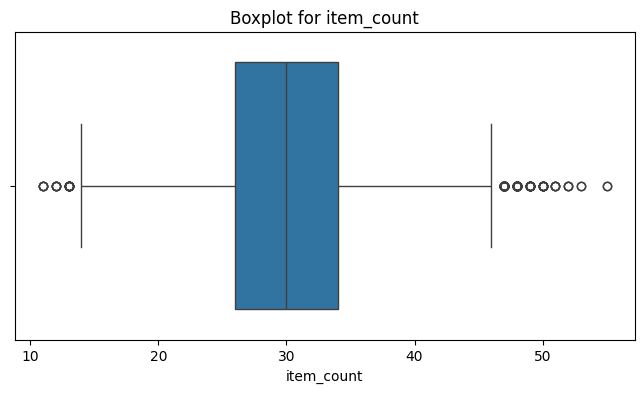

=== item_count Statistics ===
count    50000.000000
mean        30.021380
std          5.468623
min         11.000000
25%         26.000000
50%         30.000000
75%         34.000000
max         55.000000
Name: item_count, dtype: float64




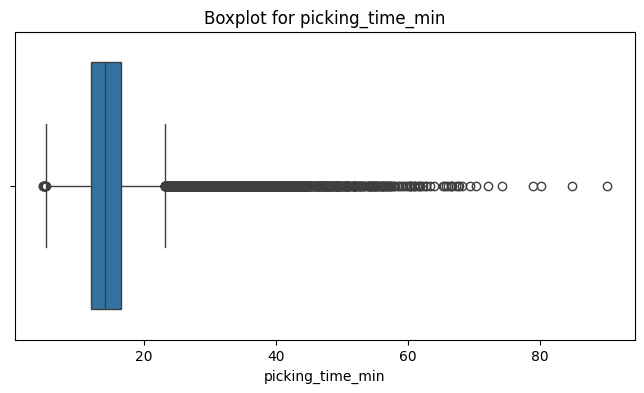

=== picking_time_min Statistics ===
count    50000.000000
mean        14.762723
std          4.879172
min          4.800000
25%         12.000000
50%         14.170000
75%         16.520000
max         90.060000
Name: picking_time_min, dtype: float64




In [ ]:
#Check Outlier in Numeric Columns

import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns to check
numeric_cols = ['item_count', 'picking_time_min']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

    # display basic stats
    print(f"=== {col} Statistics ===")
    print(df[col].describe())
    print("\n")


In [ ]:
# Columns to handle outliers
cols = ['item_count', 'picking_time_min']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap extreme values
    df[col] = df[col].clip(lower=lower, upper=upper)

# Check result
df[cols].describe()



,item_count,picking_time_min
count,50000.000000,50000.000000
mean,30.016400,14.462269
std,5.447906,3.476577
min,14.000000,5.220000
25%,26.000000,12.000000
50%,30.000000,14.170000
75%,34.000000,16.520000
max,46.000000,23.300000


In [ ]:
# Save as CSV
df.to_csv('/content/picking_clean.csv', index=False)

print("✅ File saved as picking_clean.csv")


✅ File saved as picking_clean.csv


In [ ]:
# Save as Excel
df.to_excel('/content/picking_clean.xlsx', index=False)

print("✅ File saved as picking_clean.xlsx")


✅ File saved as picking_clean.xlsx


In [ ]:
from google.colab import files

files.download('/content/picking_clean.csv')
# atau
files.download('/content/picking_clean.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>